# Data Augmentation

This notebook will present the methods for cell microscopy data and ground truth masks augmentation. This should, in theory, make our segmentation models more robust.

In [502]:
import seg_functions
from seg_functions import *
import importlib
importlib.reload(seg_functions)
from cellpose import io

In [503]:
model_dir = "C:/Users/rz200/Documents/Development/cell-SCT/segmentation/demo_train_test_data/data_for_masks_training/models/demo_model"
train_dir = "C:/Users/rz200/Documents/Development/cell-SCT/segmentation/demo_train_test_data/data_for_masks_training"
test_dir = "C:/Users/rz200/Documents/Development/cell-SCT/segmentation/demo_train_test_data/data_for_masks_testing"
train_data, train_labels = io.load_train_test_data(train_dir, mask_filter='_seg.npy')[:2]  # loads the test data
test_data, test_labels = io.load_train_test_data(test_dir, mask_filter='_seg.npy')[:2]  # loads the test data

## Augmentation functions
Here we present the methods to augment the data.

40


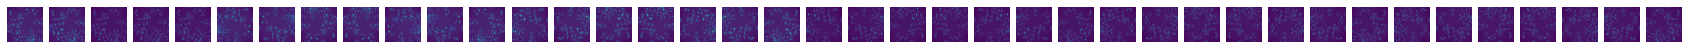

In [504]:
# Augment the data with rotations (-90,+90,+180) and flip
train_data_aug_rot, train_labels_aug_rot = augmentation_rotate(train_data,train_labels)
print(len(train_data_aug_rot))

plt.figure(figsize=(30,30))
for i in range(len(train_data_aug_rot)):
    plt.subplot(1,len(train_data_aug_rot),i+1)
    plt.axis('off')
    plt.imshow(train_data_aug_rot[i])
plt.show()

In [505]:

#Checking to see if there are any duplicate images
count = 0
for i in range(len(train_data_aug_rot)):
    for j in range(i + 1, len(train_data_aug_rot)):
        if (train_data_aug_rot[i]==train_data_aug_rot[j]).all():
            print(i,j)
            plt.figure(figsize=(10,10))
            plt.subplot(1,2,1)
            plt.imshow(train_data_aug_rot[i])
            plt.subplot(1,2,2)
            plt.imshow(train_data_aug_rot[j])
            plt.show()
            count+=1
print(count)

0


25


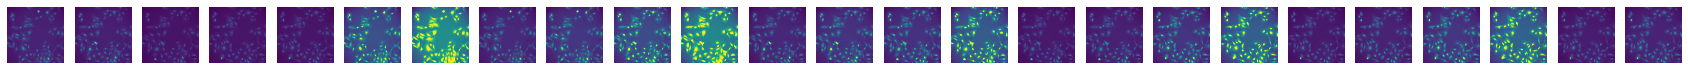

In [506]:
train_data_aug_bright = augmentation_brightness(train_data)
print(len(train_data_aug_bright))

plt.figure(figsize=(30,30))
for i in range(len(train_data_aug_bright)):
    plt.subplot(1,len(train_data_aug_bright),i+1)
    plt.axis('off')
    plt.imshow(train_data_aug_bright[i])
plt.show()

In [515]:
count = 0
for i in range(len(train_data_aug_bright)):
    for j in range(i + 1, len(train_data_aug_bright)):
        if (train_data_aug_bright[i]==train_data_aug_bright[j]).all():
            print(i,j)
            plt.figure(figsize=(10,10))
            plt.subplot(1,2,1)
            plt.imshow(train_data_aug_bright[i])
            plt.subplot(1,2,2)
            plt.imshow(train_data_aug_bright[j])
            plt.show()
            count+=1
print(count)

0


[[-98.10016556 -97.46688742 -97.71045593 ... -97.64550433 -99.17186704
  -95.06367804]
 [-97.75916964 -98.37620988 -98.5548268  ... -96.70370606 -97.2233189
  -98.48987519]
 [-99.00948803 -98.29502038 -98.79839531 ... -97.80788334 -96.73618186
  -98.5710647 ]
 ...
 [-90.72815843 -92.38442435 -92.57927916 ... -84.91498981 -85.35341314
  -83.53476821]
 [-92.43313805 -91.6861946  -90.41963831 ... -81.65117168 -83.92447784
  -82.69039735]
 [-89.29922313 -89.12060621 -89.02317881 ... -82.83653846 -81.16403464
  -82.39811513]]


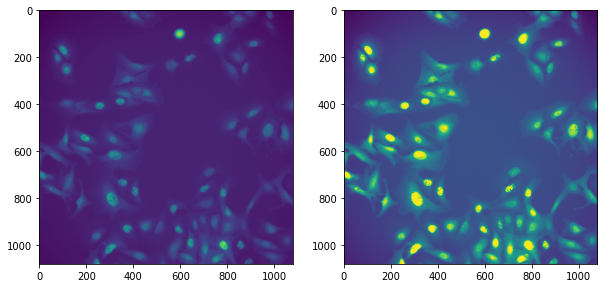

In [512]:
# Augment the data with contrast changes

value = -100
img_norm = ((train_data_aug_rot[0] - np.min(train_data_aug_rot[0])) / (np.max(train_data_aug_rot[0]) - np.min(train_data_aug_rot[0])))*255
img = np.where((0 - img_norm) < value,0,img_norm+value)
print(img)

plt.figure(figsize=(10,10))
plt.subplot(1,2,1)
plt.imshow(train_data_aug_rot[0])
plt.subplot(1,2,2)
plt.imshow(img)
plt.show()

[[101.89983444 102.53311258 102.28954407 ... 102.35449567 100.82813296
  104.93632196]
 [102.24083036 101.62379012 101.4451732  ... 103.29629394 102.7766811
  101.51012481]
 [100.99051197 101.70497962 101.20160469 ... 102.19211666 103.26381814
  101.4289353 ]
 ...
 [109.27184157 107.61557565 107.42072084 ... 115.08501019 114.64658686
  116.46523179]
 [107.56686195 108.3138054  109.58036169 ... 118.34882832 116.07552216
  117.30960265]
 [110.70077687 110.87939379 110.97682119 ... 117.16346154 118.83596536
  117.60188487]]


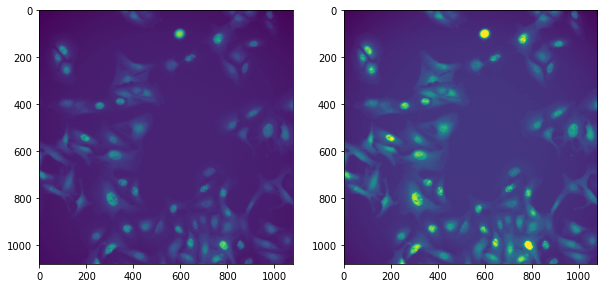

In [513]:
value = 100
img_norm = ((train_data_aug_rot[0] - np.min(train_data_aug_rot[0])) / (np.max(train_data_aug_rot[0]) - np.min(train_data_aug_rot[0])))*255
img = np.where((255 - img_norm) < value,255,img_norm+value)
print(img)

plt.figure(figsize=(10,10))
plt.subplot(1,2,1)
plt.imshow(train_data_aug_rot[0])
plt.subplot(1,2,2)
plt.imshow(img)
plt.show()

In [514]:
train_

NameError: name 'train_' is not defined

In [ ]:
from PIL import Image, ImageEnhance

enhancer = ImageEnhance.Brightness(train_data_aug_rot[0])
factor = 1 #gives original image
im_output = enhancer.enhance(factor)
plt.imshow(im_output)

In [ ]:
# Augment the data with brightness changes



In [ ]:
# Augment the data with noise

In [ ]:
# Augment the data with rotation and brightness changes

## Model training with and without augmented data

Here we train two segmentation models, one with augmented data and one without.

## Qualitative evaluation

Showing the predictions.

## Quantitative evaluation

Showing and comparing model evaluation metrics for models trained with different kinds of data, some augmented some not.